In [1]:
import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [4]:
# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
# load doc
  doc = load_doc(filename)
# clean doc
  tokens = clean_doc(doc)
# update counts
  vocab.update(tokens)

In [5]:
def load_doc(filename):
# open the file as read only
  file = open(filename, 'r')
# read all text
  text = file.read()
# close the file
  file.close()
  return text

In [6]:
def clean_doc(doc):
# split into tokens by white space
  tokens = doc.split()
# prepare regex for char filtering
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
  tokens = [re_punc.sub('', w) for w in tokens]
# remove remaining tokens that are not alphabetic
  tokens = [word for word in tokens if word.isalpha()]
# filter out stop words
  stop_words = set(stopwords.words('english'))
  tokens = [w for w in tokens if not w in stop_words]
  # filter out short tokens
  tokens = [word for word in tokens if len(word) > 1]
  # bi grams
  bitokens=[]
  for i in range(len(tokens)-1):
    bitokens.append(tokens[i]+" "+tokens[i+1])
  return bitokens+tokens

In [7]:
# load all docs in a directory
def process_docs(directory, vocab):
# walk through all files in the folder
   for filename in listdir(directory):
# skip any reviews in the test set
     if filename.startswith('cv9'):
       continue
# cre ate the full path of the file to open
     path = directory + '/' + filename
# add doc to vocab
     add_doc_to_vocab(path, vocab)

In [8]:
vocab = Counter()
# add all docs to vocab
process_docs('/gdrive/My Drive/datasets/txt_sentoken/pos', vocab)
process_docs('/gdrive/My Drive/datasets/txt_sentoken/neg', vocab)
# print the size of the vocab
print(len(vocab))
# print the top words in the vocab
print(vocab.most_common(50))

526627
[('film', 7983), ('one', 4946), ('movie', 4826), ('like', 3201), ('even', 2262), ('good', 2080), ('time', 2041), ('story', 1907), ('films', 1873), ('would', 1844), ('much', 1824), ('also', 1757), ('characters', 1735), ('get', 1724), ('character', 1703), ('two', 1643), ('first', 1588), ('see', 1557), ('way', 1515), ('well', 1511), ('make', 1418), ('really', 1407), ('little', 1351), ('life', 1334), ('plot', 1288), ('people', 1269), ('could', 1248), ('bad', 1248), ('scene', 1241), ('movies', 1238), ('never', 1201), ('best', 1179), ('new', 1140), ('scenes', 1135), ('man', 1131), ('many', 1130), ('doesnt', 1118), ('know', 1092), ('dont', 1086), ('hes', 1024), ('great', 1014), ('another', 992), ('action', 985), ('love', 977), ('us', 967), ('go', 952), ('director', 948), ('end', 946), ('something', 945), ('still', 936)]


In [9]:
print(vocab.most_common(200))

[('film', 7983), ('one', 4946), ('movie', 4826), ('like', 3201), ('even', 2262), ('good', 2080), ('time', 2041), ('story', 1907), ('films', 1873), ('would', 1844), ('much', 1824), ('also', 1757), ('characters', 1735), ('get', 1724), ('character', 1703), ('two', 1643), ('first', 1588), ('see', 1557), ('way', 1515), ('well', 1511), ('make', 1418), ('really', 1407), ('little', 1351), ('life', 1334), ('plot', 1288), ('people', 1269), ('could', 1248), ('bad', 1248), ('scene', 1241), ('movies', 1238), ('never', 1201), ('best', 1179), ('new', 1140), ('scenes', 1135), ('man', 1131), ('many', 1130), ('doesnt', 1118), ('know', 1092), ('dont', 1086), ('hes', 1024), ('great', 1014), ('another', 992), ('action', 985), ('love', 977), ('us', 967), ('go', 952), ('director', 948), ('end', 946), ('something', 945), ('still', 936), ('seems', 930), ('back', 923), ('made', 912), ('theres', 901), ('work', 901), ('makes', 883), ('however', 874), ('years', 867), ('world', 864), ('every', 858), ('big', 854), (

In [10]:
print(vocab.most_common()[:-50-1:-1])

[('guncrazy', 1), ('secondclass', 1), ('belch', 1), ('yucked', 1), ('associated see', 1), ('resumes associated', 1), ('blot resumes', 1), ('embarrassment blot', 1), ('life embarrassment', 1), ('otherwise life', 1), ('olds otherwise', 1), ('lawrence year', 1), ('ages murphy', 1), ('flawlessly ages', 1), ('baker flawlessly', 1), ('legend rick', 1), ('makeup legend', 1), ('artistry makeup', 1), ('virtue artistry', 1), ('lifes redeeming', 1), ('protest lifes', 1), ('without protest', 1), ('portrayals without', 1), ('accept portrayals', 1), ('audiences accept', 1), ('projects audiences', 1), ('greenlight projects', 1), ('studios greenlight', 1), ('scripts studios', 1), ('actors eat', 1), ('fault rest', 1), ('demeaning fault', 1), ('caricatures demeaning', 1), ('sets caricatures', 1), ('youths sets', 1), ('sexcrazed youths', 1), ('guncrazy sexcrazed', 1), ('hiphop guncrazy', 1), ('artists hiphop', 1), ('scam artists', 1), ('conniving scam', 1), ('fasttalking conniving', 1), ('presented fastt

In [11]:
min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(tokens))

81474


In [12]:
# save list to file
def save_list(lines, filename):
# convert lines to a single blob of text
  data = '\n'.join(lines)
# open file
  file = open(filename, 'w')
# write text
  file.write(data)
# close file
  file.close()
# save tokens to a vocabulary file
save_list(tokens, '/gdrive/My Drive/datasets/txt_sentoken/vocab_bi.txt')

In [13]:
def doc_to_line(filename, vocab):
# load the doc
   doc = load_doc(filename)
# clean doc
   tokens = clean_doc(doc)
  #  print(tokens) 
# filter by vocab
   tokens = [w for w in tokens if w in vocab]
   
   return ' '.join(tokens)

In [14]:
# load all docs in a directory
def process_docs(directory, vocab, is_train):
  lines = list()
# walk through all files in the folder
  for filename in listdir(directory):
# skip any reviews in the test set
    if is_train and filename.startswith('cv9'):
      continue
    if not is_train and not filename.startswith('cv9'):
      continue
# create the full path of the file to open
    path = directory + '/' + filename
# load and clean the doc
    line = doc_to_line(path, vocab)
    # print(line)
# add to list
    lines.append(line)
  return lines


# load and clean a dataset
def load_clean_dataset(vocab,is_train):
# load documents
  neg = process_docs('/gdrive/My Drive/datasets/txt_sentoken/neg', vocab,is_train)
  pos = process_docs('/gdrive/My Drive/datasets/txt_sentoken/pos', vocab,is_train)
  docs = neg + pos
# prepare labels
  labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
  return docs, labels


from keras.preprocessing.text import Tokenizer
def create_tokenizer(lines):
   tokenizer = Tokenizer()
   tokenizer.fit_on_texts(lines)
   return tokenizer

In [15]:
vocab_filename = '/gdrive/My Drive/datasets/txt_sentoken/vocab_bi.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

In [16]:
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)
# create the tokenizer
tokenizer = create_tokenizer(train_docs)
# encode data
Xtrain = tokenizer.texts_to_matrix(train_docs, mode='binary')
Xtest = tokenizer.texts_to_matrix(test_docs, mode='binary')
print(Xtrain.shape, Xtest.shape)

(1800, 25768) (200, 25768)


In [17]:
Xtrain

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [18]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
n_words = Xtest.shape[1]
# define the model
def define_model(n_words):
# define network
  model = Sequential()
  model.add(Dense(64, input_shape=(n_words,), activation='relu'))
  # model.add(Dense(128,activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
# compile network
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# summarize defined model
  # model.summary()
  # plot_model(model, to_file='model.png', show_shapes=True)
  return model

In [20]:
model=define_model(n_words)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1649216   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,649,281
Trainable params: 1,649,281
Non-trainable params: 0
_________________________________________________________________


In [21]:
import numpy as np
Xtrain=np.array(Xtrain)
ytrain=np.array(ytrain)
ytest=np.array(ytest)
Xtest=np.array(Xtest)

In [22]:
model.fit(Xtrain,ytrain,epochs=10,validation_split=0.2)

Epoch 1/10
45/45 [==============================] - 1s 21ms/step - loss: 0.5145 - accuracy: 0.7410 - val_loss: 0.5628 - val_accuracy: 0.7056
Epoch 2/10
45/45 [==============================] - 1s 14ms/step - loss: 0.0824 - accuracy: 0.9931 - val_loss: 0.7778 - val_accuracy: 0.6361
Epoch 3/10
45/45 [==============================] - 1s 14ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.5479 - val_accuracy: 0.7472
Epoch 4/10
45/45 [==============================] - 1s 15ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.6811 - val_accuracy: 0.7111
Epoch 5/10
45/45 [==============================] - 1s 15ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.7029 - val_accuracy: 0.7111
Epoch 6/10
45/45 [==============================] - 1s 14ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.7150 - val_accuracy: 0.7139
Epoch 7/10
45/45 [==============================] - 1s 14ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.7500 - val_accuracy: 0.7111
Epoch 8/10
45

In [23]:
model.evaluate(Xtest,ytest)

7/7 [==============================] - 0s 4ms/step - loss: 0.3457 - accuracy: 0.8700


[0.34567201137542725, 0.8700000047683716]

In [25]:
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
  scores = list()
  n_repeats = 10
  n_words = Xtest.shape[1]
  for i in range(n_repeats):
    model=define_model(n_words)
    model.fit(Xtrain, ytrain, epochs=10, verbose=0)
    loss, acc = model.evaluate(Xtest, ytest, verbose=0)
    scores.append(acc)
    print('%d accuracy: %s' % ((i+1), acc))
  return scores

In [26]:
evaluate_mode(Xtrain,ytrain,Xtest,ytest)

1 accuracy: 0.9200000166893005
2 accuracy: 0.9049999713897705
3 accuracy: 0.9350000023841858
4 accuracy: 0.9350000023841858
5 accuracy: 0.925000011920929
6 accuracy: 0.9449999928474426
7 accuracy: 0.9300000071525574
8 accuracy: 0.925000011920929
9 accuracy: 0.9300000071525574
10 accuracy: 0.9200000166893005


[0.9200000166893005,
 0.9049999713897705,
 0.9350000023841858,
 0.9350000023841858,
 0.925000011920929,
 0.9449999928474426,
 0.9300000071525574,
 0.925000011920929,
 0.9300000071525574,
 0.9200000166893005]

In [27]:
def prepare_data(train_docs, test_docs, mode):
# create the tokenizer
  tokenizer = Tokenizer()
# fit the tokenizer on the documents
  tokenizer.fit_on_texts(train_docs)
# encode training data set
  Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
# encode training data set
  Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
  return Xtrain, Xtest

In [28]:
from pandas import DataFrame
from matplotlib import pyplot

In [29]:
# run experiment
modes = ['binary', 'count', 'tfidf', 'freq']
results = DataFrame()
for mode in modes:
  print(mode)
# prepare data for mode
  Xtrain, Xtest = prepare_data(train_docs, test_docs, mode)
# evaluate model on data for mode
  results[mode] = evaluate_mode(Xtrain, ytrain, Xtest, ytest)
# summarize results
print(results.describe())


binary
1 accuracy: 0.9300000071525574
2 accuracy: 0.9200000166893005
3 accuracy: 0.9300000071525574
4 accuracy: 0.9350000023841858
5 accuracy: 0.9350000023841858
6 accuracy: 0.925000011920929
7 accuracy: 0.9150000214576721
8 accuracy: 0.9300000071525574
9 accuracy: 0.925000011920929
10 accuracy: 0.9300000071525574
count
1 accuracy: 0.8999999761581421
2 accuracy: 0.8949999809265137
3 accuracy: 0.8999999761581421
4 accuracy: 0.8949999809265137
5 accuracy: 0.8999999761581421
6 accuracy: 0.9100000262260437
7 accuracy: 0.9100000262260437
8 accuracy: 0.9049999713897705
9 accuracy: 0.8999999761581421
10 accuracy: 0.8899999856948853
tfidf
1 accuracy: 0.8600000143051147
2 accuracy: 0.8600000143051147
3 accuracy: 0.875
4 accuracy: 0.8650000095367432
5 accuracy: 0.8650000095367432
6 accuracy: 0.8799999952316284
7 accuracy: 0.8650000095367432
8 accuracy: 0.8949999809265137
9 accuracy: 0.8799999952316284
10 accuracy: 0.8899999856948853
freq
1 accuracy: 0.8700000047683716
2 accuracy: 0.8799999952316

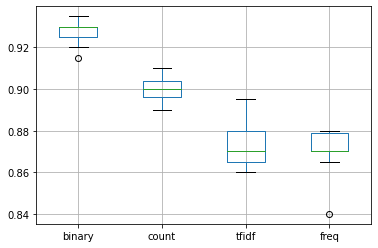

In [30]:
results.boxplot()
pyplot.show()

In [31]:
def predict_sentiment(review, vocab, tokenizer, model):
# clean
  tokens = clean_doc(review)
# filter by vocab
  tokens = [w for w in tokens if w in vocab]
# convert to line
  line = ' '.join(tokens)
# encode
  encoded = tokenizer.texts_to_matrix([line], mode='binary')
# predict sentiment
  yhat = model.predict(encoded, verbose=0)
# retrieve predicted percentage and label
  percent_pos = yhat[0,0]
  print(percent_pos)
  if round(percent_pos) == 0:
    return (1-percent_pos), 'NEGATIVE'
  return percent_pos, 'POSITIVE'

In [32]:
review="i had great exceptation, but i found it not upto the mark"
predict_sentiment(review, vocab, tokenizer, model)

0.54321784


(0.54321784, 'POSITIVE')